In [3]:
#%matplotlib widget
%matplotlib inline

resolution in x: 512
resolution in y: 512


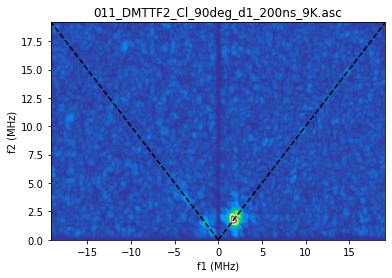

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from timeit import default_timer as timer
start = timer()


######## Program settings #######
saveFFT = False # Save results of FFT in separate files
plot_res = False # Plot spectra and FFT for each measurement as png
version = 'v2'
######## main program ###########

mainpath=os.getcwd()
Dateien=os.listdir(mainpath) 
asc_files=[]
for a in Dateien:
    if str(a[-3:])=='asc':
         asc_files.append(a)
# Creating directory for saving plots
#path=str(mainpath)+'\Results_HYSCORE_graphs_'+str(version)
#if not os.path.exists(path):
#    os.makedirs(path)

#### Extract experimental parameters from par-file ####
par_fname = asc_files[0].replace('asc','par')
fin = open(str(par_fname),'r')
for line in fin :
    p = line[0:12]
    if (p == 'Attenuation '):
        Att = float(line[19:len(line)-3])
    if (p == 'FrequencyMon'):
        freq = float(line[19:len(line)-4])
    ll = line[0:4]
    if (ll == 'XPTS'):
        xpoints = int(line[5:len(line)])
    if (ll == 'YPTS'):
        ypoints = int(line[5:len(line)])        
fin.close()
P0 = 1000 # basis power in mW (NEED TO INSERT CORRECT VALUE!!!!!)
Pow=P0*10**((-1.0*Att)/10.0) # calculate MW power from chosen attenuation
Temp= 9 # temperature in K
# Search for angle between field and sample
ii=asc_files[0].find("36_")
ll=asc_files[0].find("deg")
Ang=asc_files[0][ii+3:ll]
No=asc_files[0][0:3]
#### Extract 2D data from single dat file ####
print('resolution in x: '+str(xpoints))
print('resolution in y: '+str(ypoints))
no_freqs1 = xpoints     # resolution in x (known from measurement parameters)
no_freqs2 = ypoints # number of measurements in data set
header_len = 2     # length of header of file
freqs1 = np.zeros(no_freqs1)# array for saving frequencies in x-direction
freqs2 = np.zeros(no_freqs2)# array for saving frequencies in y-direction
data_int = np.zeros((no_freqs1,no_freqs2)) # array for saving intensities from file
f = open(asc_files[0], 'r')
lines = f.readlines() # read all lines in raw data file
for k in range(no_freqs1): # read x-frequency values once for all measurements of this set
    linh = lines[k+header_len].strip()
    colh = linh.split()
    freqs1[k] = str(colh[1])
for l in range(no_freqs2): # read signal intensities for each frequency l
    offset = l*no_freqs1+header_len
    lin = lines[offset].strip()
    col = lin.split()
    freqs2[l] = str(col[2])
    for m in range(no_freqs1):          
        linh = lines[m+offset].strip()
        colh = linh.split()
        data_int[l,m] = str(colh[3]) # use indexing for 2D plot: rows correspond to y-axis in plot, columns to x-axis in plot
f.close()  

#### Plot extracted data ####
cut = np.int(no_freqs2/2) # select only upper two quadrants for plotting 
freqs2_red = freqs2[cut:]
data_int_red = data_int[cut:,:]
scale = np.linspace(np.amin(data_int),np.amax(data_int),num=100,endpoint=True)
plt.figure(str(asc_files[0]))
#plt.title('HYSCORE: # '+str(No)+', T = '+str(Temp)+' K, angle: '+str(Ang)+' Deg')
plt.title(str(asc_files[0]))
plt.xlabel('f1 (MHz)')
plt.ylabel('f2 (MHz)')
x2d,y2d = np.meshgrid(1000*freqs1,1000*freqs2_red) # Plot frequencies in MHz
plt.contourf(x2d,y2d,data_int_red,scale,cmap='terrain')# Alternatives: jet, spectral, terrain
plt.plot(1000*freqs2_red,1000*freqs2_red,color='black',ls='--')
plt.plot(-1000*freqs2_red,1000*freqs2_red,color='black',ls='--')
plt.show()